In [1]:
import pandas as pd
import os
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.fftpack import fft
from sklearn.feature_extraction import DictVectorizer
import pyeeg
from bisect import bisect_left
import sys
from sklearn.neighbors import KNeighborsClassifier

In [2]:
frame_rate=1000

In [3]:
pd.read_csv('308ГЗ_data.txt').head()
mans = ['308', '309', '311', '314', '327']

In [4]:
data = pd.read_csv('308ГЗ_data.txt')

In [5]:
def get_fourier_8_12(data):
    freqs = frame_rate*np.fft.fftfreq(len(data))[0:len(data)//2]
    left = bisect_left(freqs, 7)
    min_bound = bisect_left(freqs, 8)
    max_bound = bisect_left(freqs, 12)
    return max(abs(fft(np.array(data)))[min_bound:max_bound])/max(abs(fft(np.array(data)))[left:min_bound])

In [6]:
good_channels = list(map(str, [8, 9, 10, 7, 15, 19, 23, 22, 24]))
def make_objects(data, is_open):
    res = []
    for i in range(0, 30000, 100):
        new_obj = data[i:i+100]
        res.append([])
        res[-1] += [get_fourier_8_12(new_obj[str(col)]) for col in good_channels]
    res = pd.DataFrame(res)
    res['target'] = int(is_open)
    return res

In [7]:
def make_objects2(data, is_open):
    res = []
    for i in range(0, 30000, 10000):
        new_obj = data[i:i+10000]
        res.append([])
        res[-1] += [pyeeg.bin_power(new_obj[col], [8, 12], 1000)[0][0] for col in good_channels]
    res = pd.DataFrame(res)
    res['target'] = int(is_open)
    return res

In [8]:
df_parts = []
for fn in os.listdir():
    if fn.endswith('.txt'):
        dat = pd.read_csv(fn)
        new_objects = make_objects2(pd.read_csv(fn), is_open = 'О' in fn)
        df_parts.append(new_objects)

C:\anaconda\lib\site-packages\pyeeg-0.4.4-py3.8.egg\pyeeg\spectrum.py:62: RuntimeWarning: invalid value encountered in true_divide


In [9]:
prepared = pd.concat(df_parts).reset_index(drop=True)

In [10]:
prepared

,0,1,2,3,4,5,6,7,8,target
0,450464.069746,447954.882795,589188.281430,415629.873431,499729.841150,413373.403487,452128.588519,307743.221636,282130.072545,0
1,471746.796866,377781.077635,548311.463100,447526.140457,456589.555520,451879.158950,380125.311739,359538.590516,323807.406162,0
2,479221.159298,371889.234799,556453.771796,378044.322657,468358.043726,383670.848824,380228.829571,284544.390640,335885.593346,0
3,170574.549843,125869.004231,153006.950282,173181.024284,146067.243720,175409.582242,128431.324667,163814.257845,168334.205100,1
4,194861.075814,113046.174878,147805.408156,169732.253526,125482.263856,199514.501629,124859.753242,187300.395999,194632.411068,1
5,176051.978303,129782.429530,188124.348778,128141.220975,110122.665139,171725.581620,149843.078027,146943.062578,168772.977314,1
6,680793.068829,423581.532938,530681.286931,753201.194502,587697.243051,854611.303331,446409.382381,687893.677950,465071.907725,0
7,683291.484822,376957.400291,513927.899270,707566.649755,541566.785741,807459.001145,403631.956352,660199.414863,455549.371126,0
8,652191.677398,387865.771184,539437.474435,668194.564867,514972.190077,815511.964405,428327.512215,583940.295098,413456.266142,0
9,131589.210739,103213.389362,111624.068307,143570.225306,110708.106403,159069.991550,100604.400217,147757.535832,120324.706286,1


In [11]:
prepared = prepared.fillna(prepared[6].mean())

In [12]:
X, y = prepared.drop('target', axis=1), prepared['target']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 32, 32))
lg = LogisticRegression()
neigh = KNeighborsClassifier(n_neighbors=3)

In [17]:
lg.fit(X_train, y_train)
neigh.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(lg.predict(X_train), y_train))
print(accuracy_score(lg.predict(X_test), y_test))
print(accuracy_score(neigh.predict(X_train), y_train))
print(accuracy_score(neigh.predict(X_test), y_test))


1.0
0.625
1.0
1.0


In [20]:
lg.fit(X, y)
neigh.fit(X, y)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier(n_neighbors=3)

In [21]:
df_parts_test = []
for fn in os.listdir('test'):
    if fn.endswith('.txt'):
        df_parts_test.append(make_objects2(pd.read_csv('test/' + fn), is_open = 'О' in fn))

In [22]:
features_df = pd.DataFrame(all_features)

NameError: name 'all_features' is not defined

In [ ]:
features_df

In [ ]:
test_prepared = pd.concat(df_parts_test).reset_index(drop=True)

In [ ]:
X_test, y_test = test_prepared.drop('target', axis=1), test_prepared['target']

In [ ]:
print(accuracy_score(lg.predict(X_test), y_test))
print(accuracy_score(neigh.predict(X_test), y_test))

In [ ]:
features_df['man'] = features_df[0].apply(lambda x:x[0:4])
features_df['label'] = features_df[0].apply(lambda x:x[4])

In [27]:
channels = ['17', '18', '19', '23']
def make_new_features(data, is_open, hid):
    feature_names = []
    res = []
    hz = [0, 4, 8, 12, 16, 20]
    for channel in channels:
        res += list(pyeeg.bin_power(data[channel], hz, 1000)[0])
        feature_names += [f"{channel}_{hz[i]}_{hz[i+1]}" for i in range(len(hz)-1)]
    res.append(is_open)
    feature_names.append("is_open")
    res.append(hid)
    feature_names.append("human_id")
    return pd.DataFrame([res], columns=feature_names)
    ##return res

In [28]:
arr = make_new_features(pd.read_csv('308ГЗ_data.txt'), 0, 308)
arr

,17_0_4,17_4_8,17_8_12,17_12_16,17_16_20,18_0_4,18_4_8,18_8_12,18_12_16,18_16_20,...,19_8_12,19_12_16,19_16_20,23_0_4,23_4_8,23_8_12,23_12_16,23_16_20,is_open,human_id
0,1.660213e+06,1.106503e+06,1.419902e+06,454325.266171,374931.30649,1.330384e+06,1.003258e+06,1.344861e+06,482110.581988,435083.070559,...,2.117993e+06,556920.519471,549851.676117,1.021002e+06,873686.965119,2.052937e+06,536349.529819,570931.173385,0,308


In [29]:
all_features = []
for fn in os.listdir():
    if fn.endswith('.txt'):
        all_features.append(make_new_features(pd.read_csv(fn), 0 if 'З' in fn else 1, fn.split('Г')[0]))
features_one = pd.concat(all_features)


all_features = []
for fn in os.listdir('test'):
    if fn.endswith('.txt'):
        all_features.append(make_new_features(pd.read_csv('test/' + fn), 0 if 'З' in fn else 1, fn.split('Г')[0]))
features_two = pd.concat(all_features)

C:\anaconda\lib\site-packages\pyeeg-0.4.4-py3.8.egg\pyeeg\spectrum.py:62: RuntimeWarning: invalid value encountered in true_divide


In [30]:
##pd.concat([features_one, features_two]).to_excel('result.xlsx')

Text(0.5, 1.0, '308ГЗ')

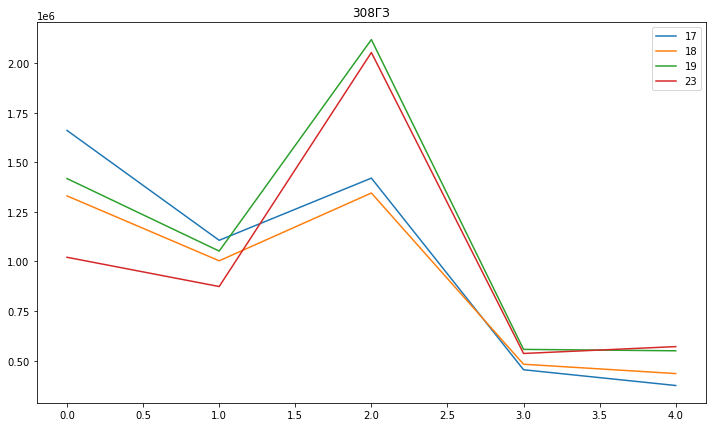

In [31]:
plt.figure(figsize=(12, 7))
Y1 = np.array(arr)[0][0:5]
Y2 = np.array(arr)[0][5:10]
Y3 = np.array(arr)[0][10:15]
Y4 = np.array(arr)[0][15:20]
X = list(range(5))
plt.plot(X, Y1, label='17')
plt.plot(X, Y2, label='18')
plt.plot(X, Y3, label='19')
plt.plot(X, Y4, label='23')
plt.legend()
plt.title("308ГЗ")

Text(0.5, 1.0, '308ГО')

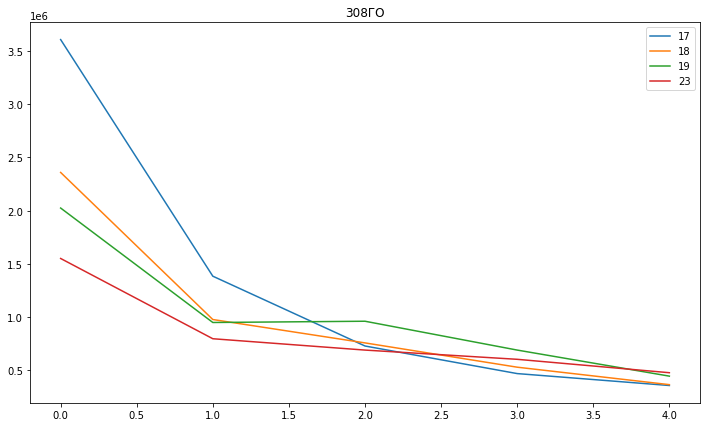

In [32]:
arr = make_new_features(pd.read_csv('308ГО_data.txt'), 0, 308)
plt.figure(figsize=(12, 7))
Y1 = np.array(arr)[0][0:5]
Y2 = np.array(arr)[0][5:10]
Y3 = np.array(arr)[0][10:15]
Y4 = np.array(arr)[0][15:20]
X = list(range(5))
plt.plot(X, Y1, label='17')
plt.plot(X, Y2, label='18')
plt.plot(X, Y3, label='19')
plt.plot(X, Y4, label='23')
plt.legend()
plt.title("308ГО")

In [33]:
arr = make_new_features(pd.read_csv('309ГЗ_data.txt'), 0, 308)
arr

,17_0_4,17_4_8,17_8_12,17_12_16,17_16_20,18_0_4,18_4_8,18_8_12,18_12_16,18_16_20,...,19_8_12,19_12_16,19_16_20,23_0_4,23_4_8,23_8_12,23_12_16,23_16_20,is_open,human_id
0,1.627837e+06,1.183360e+06,2.087666e+06,545202.337467,449607.442468,1.717586e+06,1.077275e+06,2.642241e+06,618076.640037,513047.415508,...,4.322516e+06,963704.546478,674520.868762,1.218881e+06,806537.312038,2.153277e+06,578845.527441,474821.921133,0,308


Text(0.5, 1.0, '309ГЗ')

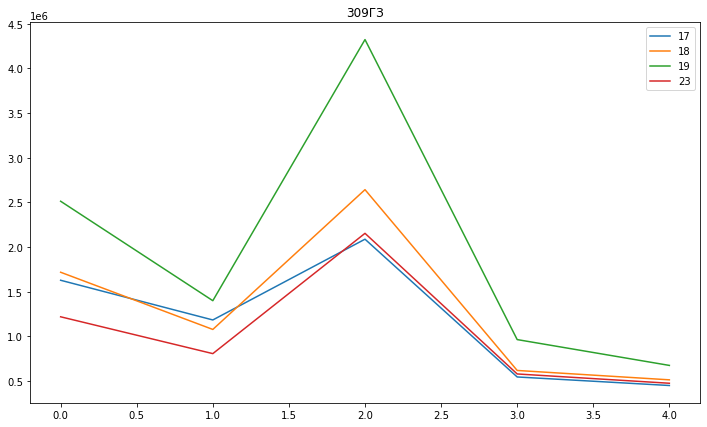

In [34]:
plt.figure(figsize=(12, 7))
Y1 = np.array(arr)[0][0:5]
Y2 = np.array(arr)[0][5:10]
Y3 = np.array(arr)[0][10:15]
Y4 = np.array(arr)[0][15:20]
X = list(range(5))
plt.plot(X, Y1, label='17')
plt.plot(X, Y2, label='18')
plt.plot(X, Y3, label='19')
plt.plot(X, Y4, label='23')
plt.legend()
plt.title("309ГЗ")

Text(0.5, 1.0, '309ГО')

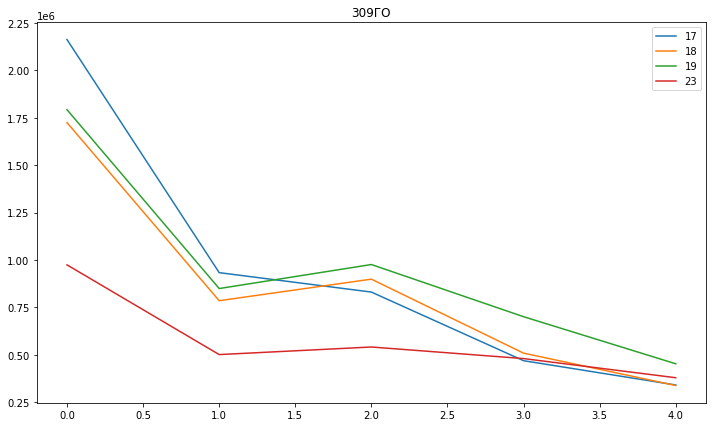

In [35]:
arr = make_new_features(pd.read_csv('309ГО_data.txt'), 0, 308)
plt.figure(figsize=(12, 7))
Y1 = np.array(arr)[0][0:5]
Y2 = np.array(arr)[0][5:10]
Y3 = np.array(arr)[0][10:15]
Y4 = np.array(arr)[0][15:20]
X = list(range(5))
plt.plot(X, Y1, label='17')
plt.plot(X, Y2, label='18')
plt.plot(X, Y3, label='19')
plt.plot(X, Y4, label='23')
plt.legend()
plt.title("309ГО")

In [36]:
data_close = pd.read_csv('327ГЗ_data.txt')
data_open = pd.read_csv('327ГО_data.txt')

In [37]:
fourier_close = fft(np.array(data_close['23']))
fourier_open = fft(np.array(data_open['23']))

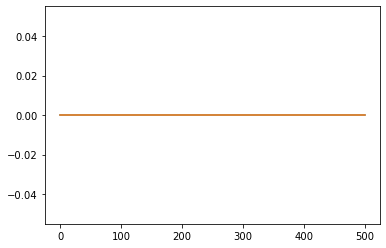

In [38]:
plt.plot(list(map(abs, fourier_open[0:500])))
plt.plot(list(map(abs, fourier_close[0:500])))

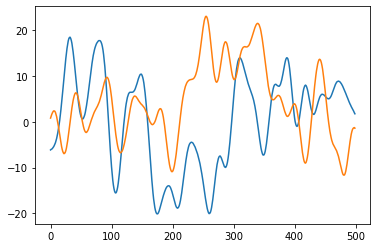

In [39]:
plt.plot(np.array(data_open['24'][0:500]))
plt.plot(np.array(data_close['24'][0:500]))

In [40]:
ft = fft(np.array(data_close['12']))
ft_open = fft(np.array(data_open['12']))

In [41]:
min_bound = 250
max_bound = 400

In [42]:
freqs = np.fft.fftfreq(len(data_close['12']))
freqs_open = np.fft.fftfreq(len(data_open['12']))

In [43]:
freqs

array([ 0.00000000e+00,  3.33333333e-05,  6.66666667e-05, ...,
       -1.00000000e-04, -6.66666667e-05, -3.33333333e-05])

Text(0.5, 0, 'Frequency')

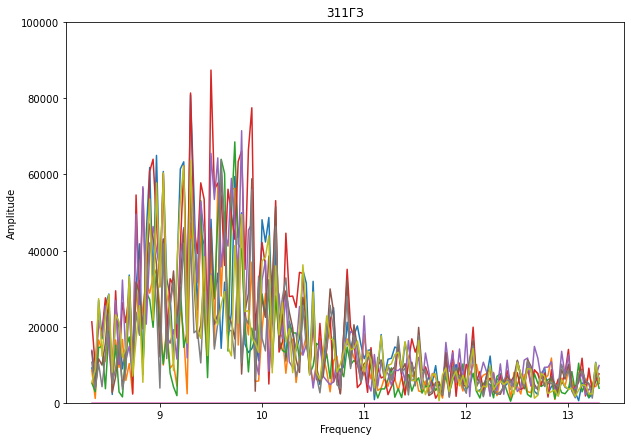

In [44]:
plt.figure(figsize=(10, 7))
plt.title('311ГЗ')
for chanel in good_channels:
    ft = fft(np.array(data_close[str(chanel)]))
    plt.plot(abs(freqs * 1000)[min_bound:max_bound], abs(ft[min_bound:max_bound]))
plt.ylim([0,100000])
plt.ylabel('Amplitude')
plt.xlabel('Frequency')

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('311ГО')
for chanel in good_channels:
    ft = fft(np.array(data_open[str(chanel)]))
    plt.plot(abs(freqs * 1000)[min_bound:max_bound], abs(ft[min_bound:max_bound]))
plt.ylim([0,100000])
plt.ylabel('Amplitude')
plt.xlabel('Frequency')

In [79]:
indexes = []
for i, el in enumerate(ft):
    if min_bound <= abs(el) <= max_bound:
        indexes.append(i)

In [25]:
pyeeg.bin_power(data_open['12'], Band= [7, 8, 12], Fs=1000)

(array([212781.69355452, 774736.21512662]), array([0.21547123, 0.78452877]))

In [26]:
pyeeg.bin_power(data_close['12'], Band= [7, 8, 12], Fs=1000)

(array([107424.74953052, 894184.36993445]), array([0.10725217, 0.89274783]))

In [22]:
pyeeg.bin_power(data_close['24'], Band= [8, 12], Fs=1000)[0][0]

1663641.6973690097